In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
raw_data = pd.read_excel('/Users/aryamonani/Downloads/Standard Metropolitan Areas Data.xlsx') #reading data into
                                                                                              #variable raw_data

In [3]:
raw_data.head() #first 4 rows of the dataset

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.554916
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.029927
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.322904
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.383524
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.189189


In [4]:
raw_data.describe(include = 'all') #no missing values, min to max rows seem fine except labor,
                                   #check for skewness, since data is numeric no need to check for cardinality.

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643757
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.471362
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.321839
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.112486
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.061290
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.859055
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.622010


CLEANING DATA

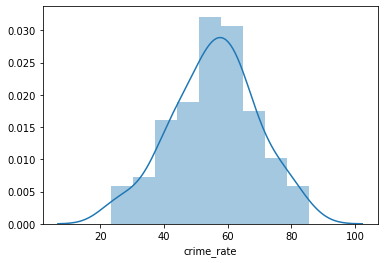

In [5]:
sns.distplot(raw_data['crime_rate']) #normally distributed, neglible skewness

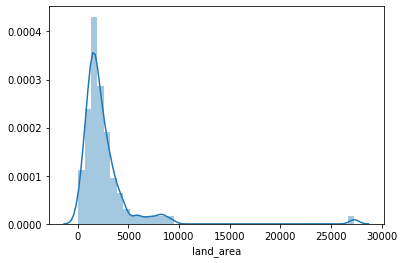

In [6]:
sns.distplot(raw_data['land_area']) #outliers are present, data is skewed.

In [7]:
raw_data['log_land_area'] = np.log(raw_data['land_area']) #applying log transform on land_area and 
                                                          #storing it in log_land_area

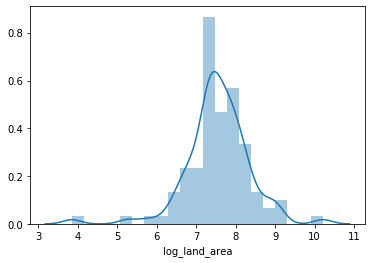

In [8]:
sns.distplot(raw_data['log_land_area']) #less skewness than before

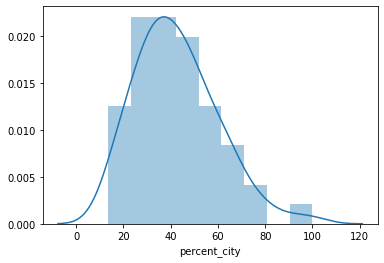

In [9]:
sns.distplot(raw_data['percent_city']) #normally distributed negligible skewness

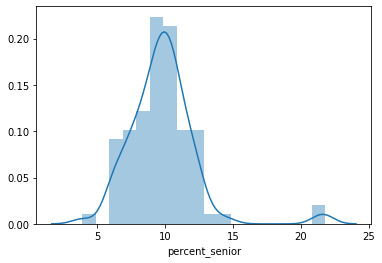

In [10]:
sns.distplot(raw_data['percent_senior']) #normally distributed, negligble skewness

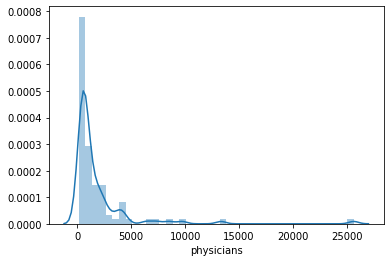

In [11]:
sns.distplot(raw_data['physicians']) #outliers are present data is skewed

In [12]:
raw_data['log_physicians'] = np.log(raw_data['physicians'])

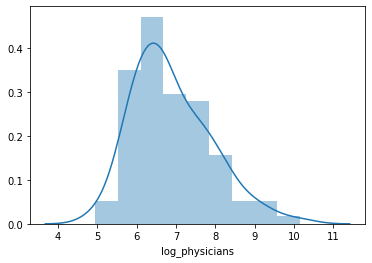

In [13]:
sns.distplot(raw_data['log_physicians']) #skewness is much lower

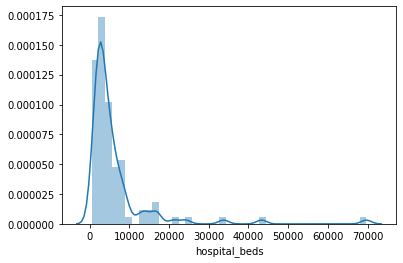

In [14]:
sns.distplot(raw_data['hospital_beds']) #outliers are present, data is skewed

In [15]:
raw_data['log_hospital_beds'] = np.log(raw_data['hospital_beds'])#applying log transform on hospital_beds and 
                                                                 #storing it in log_hospital_beds

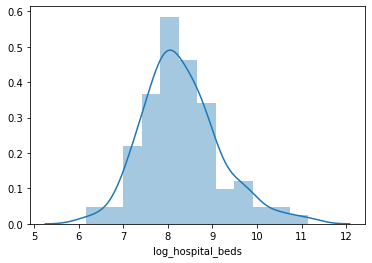

In [16]:
sns.distplot(raw_data['log_hospital_beds']) #skewness is much lower

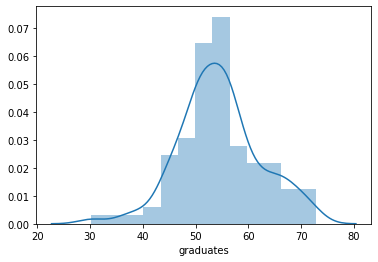

In [17]:
sns.distplot(raw_data['graduates']) #normally distributed, negligble skewness

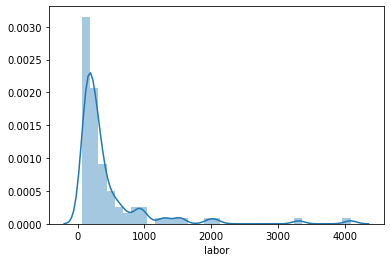

In [18]:
sns.distplot(raw_data['labor']) #outliers are present, data is skewed

In [19]:
raw_data['log_labor'] = np.log(raw_data['labor'])

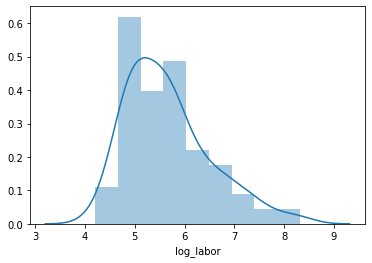

In [20]:
sns.distplot(raw_data['log_labor']) #skewness is much lower

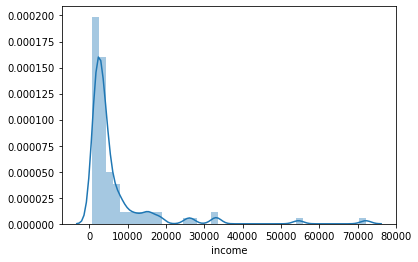

In [21]:
sns.distplot(raw_data['income']) #outliers are present, data is skewed

In [22]:
raw_data['log_income'] = np.log(raw_data['income'])

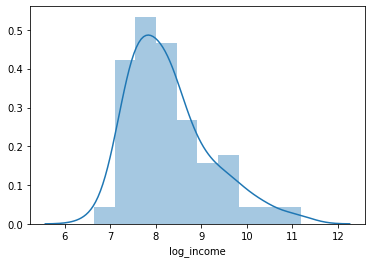

In [23]:
sns.distplot(raw_data['log_income']) #skewness is much lower

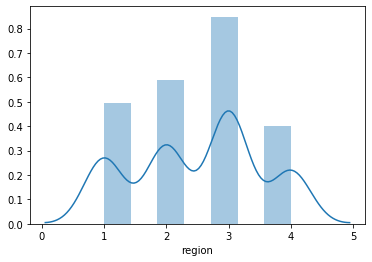

In [24]:
sns.distplot(raw_data['region'])

In [25]:
raw_data.head() #new log columns have been added, which will be used as our predictors

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate,log_land_area,log_physicians,log_hospital_beds,log_labor,log_income
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.554916,7.232733,10.151402,11.151640,8.314808,11.185809
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.029927,8.221210,9.497472,10.675723,8.103464,10.906726
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.322904,8.175548,9.182352,10.426173,7.633515,10.410787
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.383524,8.272826,8.764366,10.092743,7.584112,10.401410
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.189189,7.816014,9.048057,9.726213,7.322841,10.187651


In [26]:
raw_data.drop(['land_area','physicians', 'hospital_beds', 'labor', 'income'], axis = 1, inplace = True)

In [27]:
data_cleaned = raw_data.copy()

In [28]:
data_cleaned.head()

,percent_city,percent_senior,graduates,region,crime_rate,log_land_area,log_physicians,log_hospital_beds,log_labor,log_income
0,78.1,12.3,50.1,1,75.554916,7.232733,10.151402,11.151640,8.314808,11.185809
1,43.9,9.4,53.9,2,56.029927,8.221210,9.497472,10.675723,8.103464,10.906726
2,37.4,10.7,50.6,1,41.322904,8.175548,9.182352,10.426173,7.633515,10.410787
3,29.9,8.8,52.2,2,67.383524,8.272826,8.764366,10.092743,7.584112,10.401410
4,31.5,10.5,66.1,4,80.189189,7.816014,9.048057,9.726213,7.322841,10.187651


In [29]:
data_cleaned[['log_land_area', 'percent_city', 'percent_senior', 'log_physicians', 'log_hospital_beds', 
              'graduates', 'log_labor', 'log_income', 'region', 'crime_rate']]

,log_land_area,percent_city,percent_senior,log_physicians,log_hospital_beds,graduates,log_labor,log_income,region,crime_rate
0,7.232733,78.1,12.3,10.151402,11.151640,50.1,8.314808,11.185809,1,75.554916
1,8.221210,43.9,9.4,9.497472,10.675723,53.9,8.103464,10.906726,2,56.029927
2,8.175548,37.4,10.7,9.182352,10.426173,50.6,7.633515,10.410787,1,41.322904
3,8.272826,29.9,8.8,8.764366,10.092743,52.2,7.584112,10.401410,2,67.383524
4,7.816014,31.5,10.5,9.048057,9.726213,66.1,7.322841,10.187651,4,80.189189
...,...,...,...,...,...,...,...,...,...,...
94,7.320527,38.7,10.7,5.852202,6.996681,50.4,4.845761,7.280697,4,70.661017
95,7.341484,39.6,8.1,5.068904,6.175867,30.3,4.389499,6.645091,3,36.362069
96,6.918695,37.8,10.5,5.575949,6.871091,70.7,4.534748,7.198184,3,60.163090
97,6.700731,13.4,10.9,5.916202,8.379080,58.0,4.574711,7.370860,1,36.327586


DEFINING OUR PREDICTOR AND TARGET

In [30]:
predictor = data_cleaned.copy()

In [31]:
target = predictor.crime_rate

In [32]:
predictor.drop(['crime_rate'], axis = 1, inplace = True)

In [33]:
predictor.head()

,percent_city,percent_senior,graduates,region,log_land_area,log_physicians,log_hospital_beds,log_labor,log_income
0,78.1,12.3,50.1,1,7.232733,10.151402,11.151640,8.314808,11.185809
1,43.9,9.4,53.9,2,8.221210,9.497472,10.675723,8.103464,10.906726
2,37.4,10.7,50.6,1,8.175548,9.182352,10.426173,7.633515,10.410787
3,29.9,8.8,52.2,2,8.272826,8.764366,10.092743,7.584112,10.401410
4,31.5,10.5,66.1,4,7.816014,9.048057,9.726213,7.322841,10.187651


In [34]:
target.head()

0    75.554916
1    56.029927
2    41.322904
3    67.383524
4    80.189189
Name: crime_rate, dtype: float64

SPLITTING OUR DATA INTO TRAIN AND VALID

In [35]:
predictor_train, predictor_valid, target_train, target_valid = train_test_split(predictor, target, train_size = 0.8,
                                                                             test_size = 0.2, random_state = 0)

MAKING PREDICTIONS

In [36]:
from xgboost import XGBRegressor
model_1 = XGBRegressor() #importing the XGBRegressor library for Supervised ML

In [37]:
model_1.fit(predictor_train, target_train) #training the data

[17:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
prediction_1 = model_1.predict(predictor_valid) #getting predictions

In [39]:
mae_1 = mean_absolute_error(target_valid, prediction_1)

In [40]:
mae_1

9.440219285041184

In [41]:
prediction_1

array([50.345642, 36.695404, 64.41582 , 40.287857, 38.017616, 40.466164,
       67.068115, 69.49948 , 63.888733, 72.07018 , 65.68154 , 51.614323,
       50.70521 , 65.5014  , 61.586388, 57.84284 , 54.764317, 47.73927 ,
       62.006565, 58.94272 ], dtype=float32)

In [42]:
output = pd.DataFrame({'Crime_rate' : target_valid,
                       'crime_rate' : prediction_1})

In [43]:
output #as it can be seen the prediction is somewhat accurate.
       #will try to make the model even more accurate.

,Crime_rate,crime_rate
26,51.689694,50.345642
86,38.242647,36.695404
2,41.322904,64.415817
55,58.790043,40.287857
75,36.473856,38.017616
92,53.681275,40.466164
16,64.678986,67.068115
73,56.061290,69.499481
54,53.758547,63.888733
94,70.661017,72.070183


In [44]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_2.fit(predictor_train, target_train)

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [45]:
prediction_2 = model_2.predict(predictor)
mae_2 = mean_absolute_error(target, prediction_2)
mae_2

1.930229301711559

In [46]:
output_2 = pd.DataFrame({'Crime_rate' : target,
                       'crime_rate' : prediction_2})

In [47]:
output_2

,Crime_rate,crime_rate
0,75.554916,75.550919
1,56.029927,56.027180
2,41.322904,62.744431
3,67.383524,67.378738
4,80.189189,80.196800
...,...,...
94,70.661017,73.959183
95,36.362069,36.360893
96,60.163090,60.173222
97,36.327586,36.321911


In [48]:
target.shape

(99,)

In [49]:
prediction_2.shape

(99,)

READING THE NEW DATA SET TO MAKE PREDICTIONS

In [50]:
raw_data_test = pd.read_excel('/Users/aryamonani/Downloads/Model Prediction.xlsx') #reading data

In [51]:
raw_data_test.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,0.0
mean,2494.380952,40.054762,9.911905,1659.857143,5635.047619,54.709524,390.116667,5840.619048,2.738095,NaN
std,2077.962181,18.360419,2.545795,2567.526565,7127.897986,8.306090,544.346016,8674.052964,1.013555,NaN
min,228.000000,0.000000,6.800000,220.000000,929.000000,39.100000,104.400000,1351.000000,1.000000,NaN
25%,1228.000000,25.175000,8.100000,405.250000,2040.750000,47.900000,130.175000,1867.750000,2.000000,NaN
50%,1739.000000,40.000000,9.700000,695.500000,3161.500000,53.000000,179.150000,2445.500000,3.000000,NaN
75%,2854.000000,50.475000,10.700000,1731.000000,6207.500000,62.800000,393.725000,5804.750000,3.750000,NaN
max,9240.000000,78.700000,20.600000,15389.000000,39699.000000,71.200000,3353.600000,52737.000000,4.000000,NaN


In [52]:
raw_data_test.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4,NaN
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4,NaN
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1,NaN
3,2042,24.5,16.5,4071,10039,51.9,681.7,10166,3,NaN
4,1630,41.9,10.7,724,4395,50.0,198.0,2445,3,NaN


CLEANING THE NEW DATA, FOR MAKING ACCURATE PREDICTIONS USING THE MODEL TRAINED ABOVE

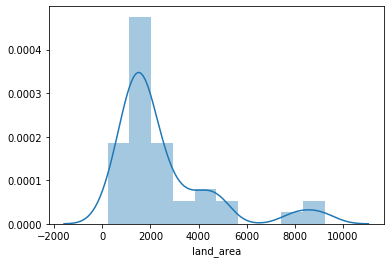

In [53]:
sns.distplot(raw_data_test['land_area']) #outliers are present, data is skewed.

In [54]:
raw_data_test['log_land_area'] = np.log(raw_data_test['land_area']) #applying log transform on land_area and 
                                                                    #storing it in log_land_area

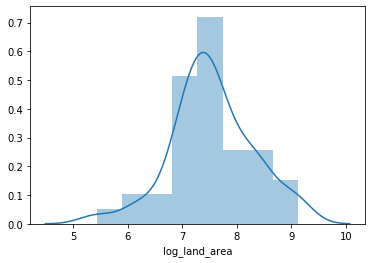

In [55]:
sns.distplot(raw_data_test['log_land_area']) #less skewness than before

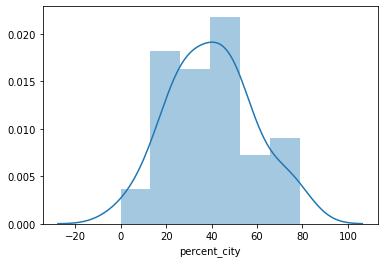

In [56]:
sns.distplot(raw_data_test['percent_city']) #normally distributed

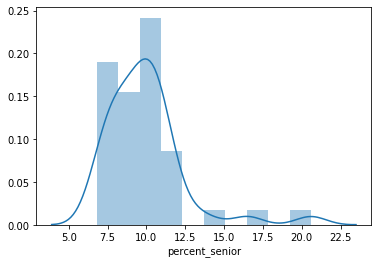

In [57]:
sns.distplot(raw_data_test['percent_senior']) #outliers are present, data is skewed.

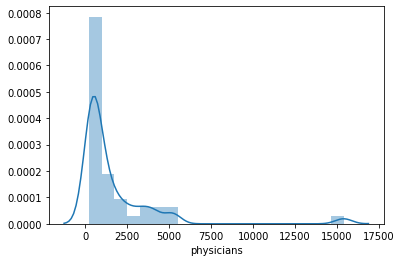

In [58]:
sns.distplot(raw_data_test['physicians'])

In [59]:
raw_data_test['log_physicians'] = np.log(raw_data_test['physicians'])

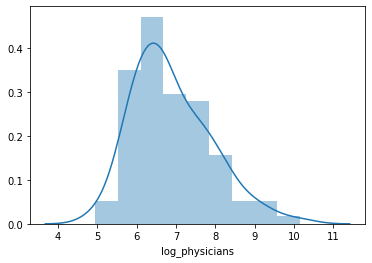

In [60]:
sns.distplot(raw_data['log_physicians'])

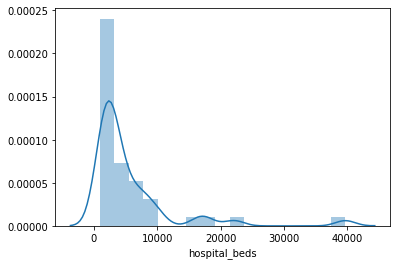

In [61]:
sns.distplot(raw_data_test['hospital_beds'])

In [62]:
raw_data_test['log_hospital_beds'] = np.log(raw_data_test['hospital_beds'])

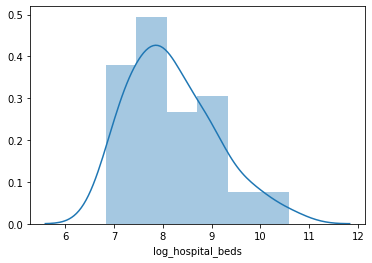

In [63]:
sns.distplot(raw_data_test['log_hospital_beds'])

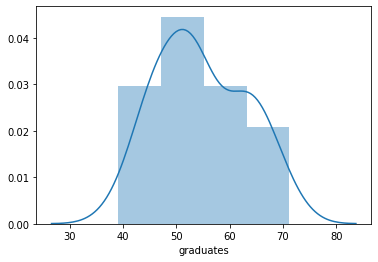

In [64]:
sns.distplot(raw_data_test['graduates'])

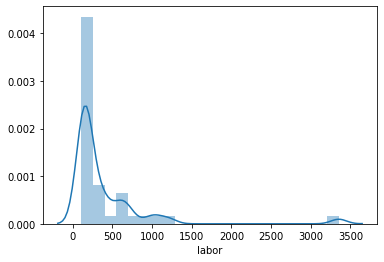

In [65]:
sns.distplot(raw_data_test['labor'])

In [66]:
raw_data_test['log_labor'] = np.log(raw_data_test['labor'])

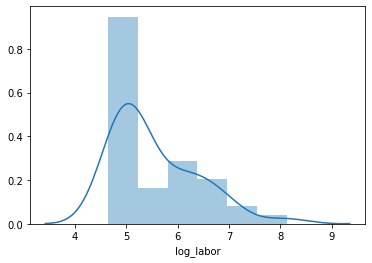

In [67]:
sns.distplot(raw_data_test['log_labor'])

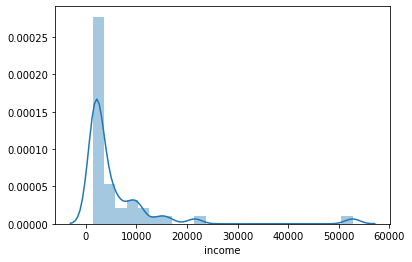

In [68]:
sns.distplot(raw_data_test['income'])

In [69]:
raw_data_test['log_income'] = np.log(raw_data_test['income'])

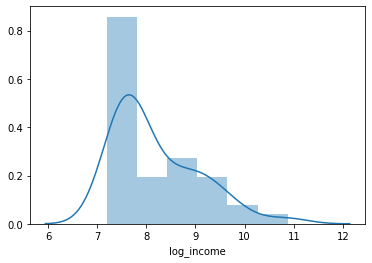

In [70]:
sns.distplot(raw_data_test['log_income'])

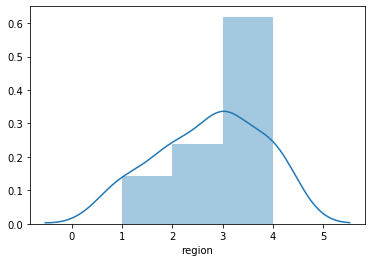

In [71]:
sns.distplot(raw_data_test['region'])

In [72]:
raw_data_test.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate,log_land_area,log_physicians,log_hospital_beds,log_labor,log_income
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4,NaN,8.202482,7.765569,8.736168,6.290272,8.960853
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4,NaN,8.493515,6.771936,7.712444,5.221436,7.763446
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1,NaN,7.268920,5.834811,6.981006,5.054971,7.680176
3,2042,24.5,16.5,4071,10039,51.9,681.7,10166,3,NaN,7.621685,8.311644,9.214233,6.524590,9.226804
4,1630,41.9,10.7,724,4395,50.0,198.0,2445,3,NaN,7.396335,6.584791,8.388223,5.288267,7.801800


In [73]:
data_test_cleaned = raw_data_test.drop(['land_area', 'physicians', 'hospital_beds', 'labor', 'income', 'crime_rate'], 
                    axis = 1, inplace = False)

In [74]:
data_test_cleaned[['log_land_area', 'percent_city', 'percent_senior', 'log_physicians', 
                  'log_hospital_beds', 'graduates', 'log_labor', 'log_income', 'region']]

,log_land_area,percent_city,percent_senior,log_physicians,log_hospital_beds,graduates,log_labor,log_income,region
0,8.202482,34.6,11.1,7.765569,8.736168,62.9,6.290272,8.960853,4
1,8.493515,72.4,7.3,6.771936,7.712444,64.9,5.221436,7.763446,4
2,7.268920,13.4,11.7,5.834811,6.981006,44.7,5.054971,7.680176,1
3,7.621685,24.5,16.5,8.311644,9.214233,51.9,6.524590,9.226804,3
4,7.396335,41.9,10.7,6.584791,8.388223,50.0,5.288267,7.801800,3
5,8.971321,44.4,6.9,5.986452,7.218910,65.2,5.160204,7.787382,4
6,7.834788,78.7,8.4,7.473069,8.944289,46.5,5.968963,8.627302,3
7,7.170120,47.6,6.8,7.935230,8.514991,69.0,6.414770,9.128588,4
8,7.438384,18.8,8.0,6.605298,8.125927,45.9,4.790820,7.387709,3
9,6.165418,8.9,10.9,6.668228,7.929487,60.1,5.386328,8.189522,1


MAKING PREDICTIONS USING model_2 A MODEL WHICH WAS TRAINED ABOVE

In [75]:
prediction_3 = model_2.predict(data_test_cleaned)

In [76]:
prediction_3.shape #shape of the variable

(42,)

In [77]:
data_test_cleaned['Crime Rate'] = prediction_3

In [78]:
data_test_cleaned

,percent_city,percent_senior,graduates,region,log_land_area,log_physicians,log_hospital_beds,log_labor,log_income,Crime Rate
0,34.6,11.1,62.9,4,8.202482,7.765569,8.736168,6.290272,8.960853,79.991096
1,72.4,7.3,64.9,4,8.493515,6.771936,7.712444,5.221436,7.763446,66.265907
2,13.4,11.7,44.7,1,7.268920,5.834811,6.981006,5.054971,7.680176,19.936312
3,24.5,16.5,51.9,3,7.621685,8.311644,9.214233,6.524590,9.226804,63.707203
4,41.9,10.7,50.0,3,7.396335,6.584791,8.388223,5.288267,7.801800,51.788975
5,44.4,6.9,65.2,4,8.971321,5.986452,7.218910,5.160204,7.787382,67.892677
6,78.7,8.4,46.5,3,7.834788,7.473069,8.944289,5.968963,8.627302,63.909676
7,47.6,6.8,69.0,4,7.170120,7.935230,8.514991,6.414770,9.128588,62.597260
8,18.8,8.0,45.9,3,7.438384,6.605298,8.125927,4.790820,7.387709,55.491104
9,8.9,10.9,60.1,1,6.165418,6.668228,7.929487,5.386328,8.189522,53.341946


PREDICTIONS ARE MADE USING THE MODEL WE TRAINED EARLIER. NOW THESE NEW PREDICTIONS WILL BE ADDED TO THE NEW DATASET

In [79]:
Data_Prediction = pd.read_excel('/Users/aryamonani/Downloads/Model Prediction.xlsx') #reading data again into new variable

In [80]:
Data_Prediction['crime_rate'] = prediction_3

In [81]:
Data_Prediction.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4,79.991096
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4,66.265907
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1,19.936312


In [82]:
Data_Prediction.head(10)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4,79.991096
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4,66.265907
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1,19.936312
3,2042,24.5,16.5,4071,10039,51.9,681.7,10166,3,63.707203
4,1630,41.9,10.7,724,4395,50.0,198.0,2445,3,51.788975
5,7874,44.4,6.9,398,1365,65.2,174.2,2410,4,67.892677
6,2527,78.7,8.4,1760,7664,46.5,391.1,5582,3,63.909676
7,1300,47.6,6.8,2794,4989,69.0,610.8,9215,4,62.597260
8,1700,18.8,8.0,739,3381,45.9,120.4,1616,3,55.491104
9,476,8.9,10.9,787,2778,60.1,218.4,3603,1,53.341946


In [86]:
Data_Prediction.to_excel(r'/Users/aryamonani/Desktop/Data_Prediction.xlsx', index = False) #downloading the final 
                                                                                           #document.